In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2, os, shutil, re, math, urllib
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image

# ! pip install scikit-image
from skimage.exposure import rescale_intensity
from skimage.transform import rescale, rotate
from skimage.color import rgb2gray
from skimage.feature import hog

cwd = os.getcwd()

# Features

In [51]:
# Helper functions
train_dir = os.path.join(cwd, "Subsamples/train")

# Read grayscale image with intensity range between 0-1 (from inclass Features exercise)
def read_image(in_path):
    img = np.array(cv2.imread(in_path))
    if img is None:
        raise FileNotFoundError(f"Unable to read image at path: {in_path}")

    # convert to floating point image with intensity [0, 1]
    if np.max(img) > 1:
        img = img.astype(np.float32) / 255.0

    # convert to grayscale
    if len(img.shape) > 2:
        img = rgb2gray(img)

    return img

# Adapted from in-class Least Squares exercise
def display_img_colorbar(img, ax, title=None, colorbar=False):
    # Display image
    im_ax = ax.imshow(img, cmap='gray')

    # Add title
    if title:
        ax.set_title(title)

    # Add colorbar if specified
    if colorbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im_ax, cax=cax)

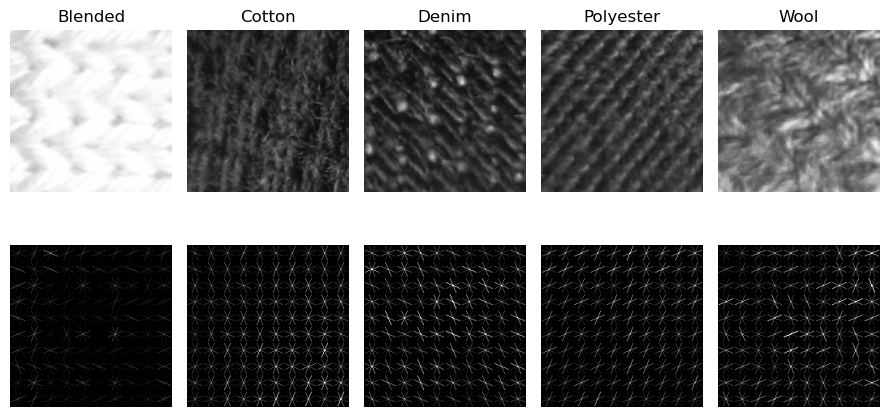

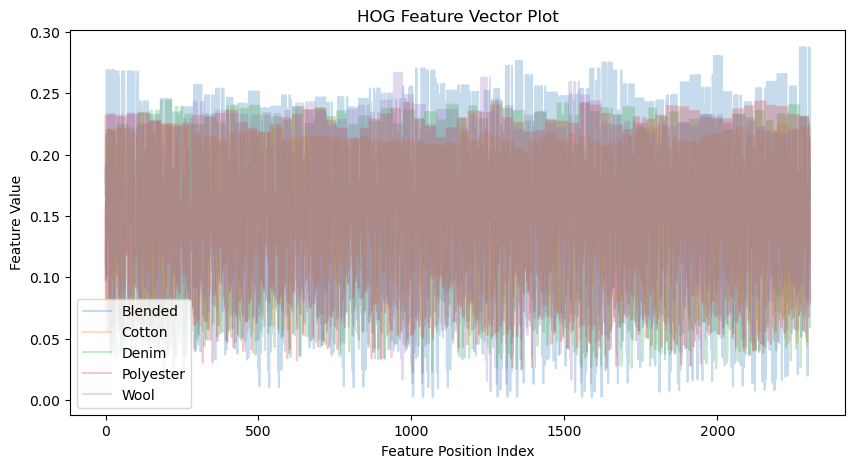

In [7]:
# HOG (Isi)
impaths = ['Subsamples/train/Blended_6_im_1b.png', 'Subsamples/train/Cotton_73_im_3a.png','Subsamples/train/Denim_1042_im_4d.png','Subsamples/train/Polyester_377_im_1c.png','Subsamples/train/Wool_373_im_4c.png']
fig, ax = plt.subplots(nrows=2, ncols=len(impaths), figsize=(9,5))
images = []
features = []
labels=[]
for i, impath in enumerate(impaths):
  #im_processed = rescale_image(read_image(impath))
  im_processed = read_image(impath)
  #adding the name of each images    
  label = impath.split('/')[2].split('_')[0]
  labels.append(label)
  #if i == 3:
    # im_processed = rotate(im_processed, -90)
    # im_processed = im_processed[:, ::-1]
    # im_processed = rescale_intensity(im_processed, (0,1))
  images.append(im_processed)
  f, h = hog(im_processed, orientations=4, pixels_per_cell=(20, 20), visualize=True)
  features.append(f)
  ax[0,i].imshow(im_processed, cmap='gray', vmin=0, vmax=1)
  ax[0,i].axis('off')
  ax[0,i].set_title('{}'.format(labels[i]))
  ax[1,i].imshow(10*h, cmap='gray', vmin=0, vmax=0.5)
  ax[1,i].axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for f in features:
  plt.plot(f, alpha=0.25)
plt.title("HOG Feature Vector Plot")
plt.xlabel("Feature Position Index")
plt.ylabel("Feature Value")
plt.legend(['{}'.format(labels[i]) for i in range(len(labels))])
plt.show()

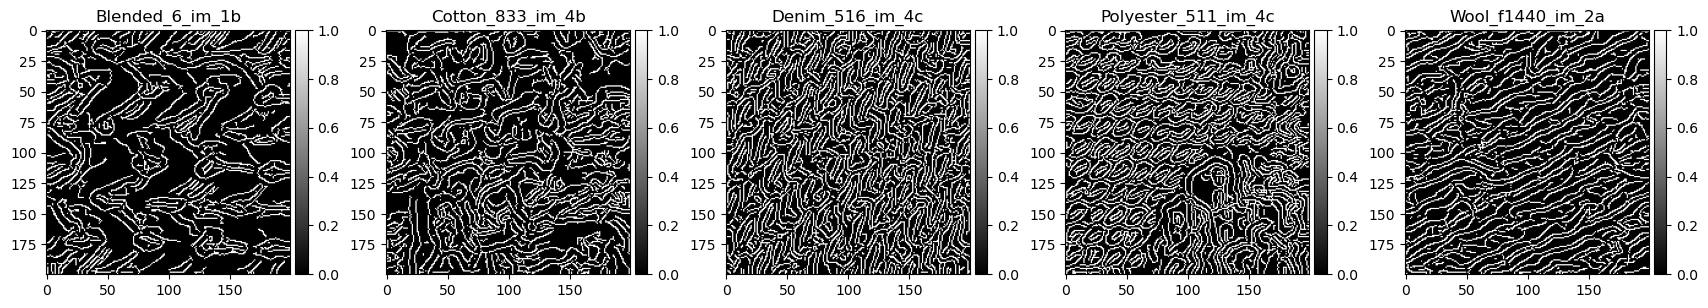

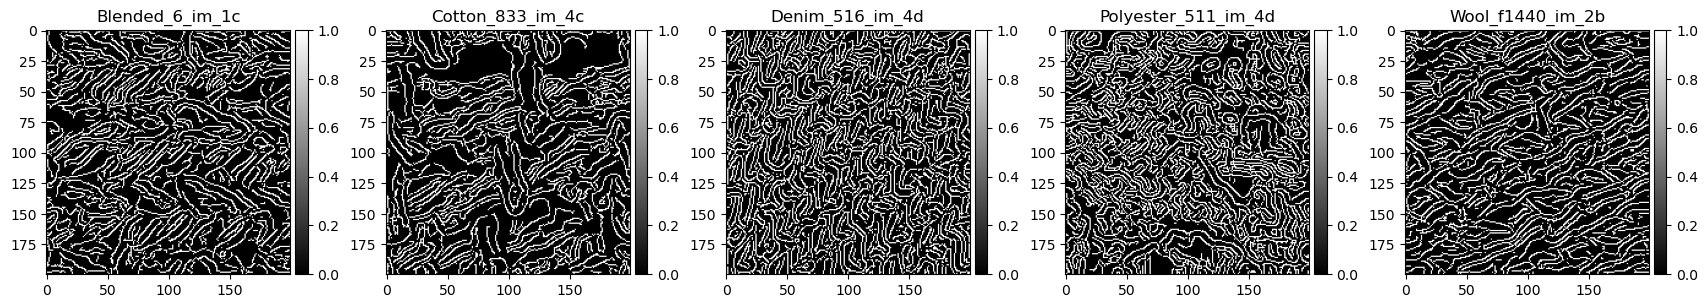

In [52]:
# Canny (Ellis)
file_list = ['Blended_6_im_1b.png','Cotton_833_im_4b.png','Denim_516_im_4c.png','Polyester_511_im_4c.png','Wool_f1440_im_2a.png']
# Plot images in a row with one colorbar on the right side
fig, axes = plt.subplots(1, len(file_list), figsize=(18, 5))

for i, image_path in enumerate(file_list):
    im = read_image(os.path.join(train_dir,image_path))
    # Extract the features from the image
    # convert to grayscale
    if np.max(im)>1:
        im = im.astype(np.float32)/255.0

    # compute edges of the image
    sobelx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=21) # Find x and y gradients
    sobely = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=21)
    magnitude = np.sqrt(sobelx**2.0 + sobely**2.0)
    magnitude = magnitude / np.max(magnitude) # normalize
    
    # threshold the image and get the interesting points
    im_threshold = cv2.Canny(image=(magnitude * 255).astype(np.uint8), threshold1=0, threshold2=100) # Canny Edge
    im_threshold = im_threshold / np.max(im_threshold) # normalize

    im_title = os.path.splitext(image_path)[0]
    # Display image and colorbar on the same subplot
    display_img_colorbar(im_threshold, axes[i], title=f"{im_title}",colorbar=True)

plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.3)
plt.show()

# SECOND ROW 
file_list = ['Blended_6_im_1c.png','Cotton_833_im_4c.png','Denim_516_im_4d.png','Polyester_511_im_4d.png','Wool_f1440_im_2b.png']
# Plot images in a row with one colorbar on the right side
fig, axes = plt.subplots(1, len(file_list), figsize=(18, 5))

for i, image_path in enumerate(file_list):
    im = read_image(os.path.join(train_dir,image_path))
    # Extract the features from the image
    # convert to grayscale
    if np.max(im)>1:
        im = im.astype(np.float32)/255.0

    # compute edges of the image
    sobelx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=21) # Find x and y gradients
    sobely = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=21)
    magnitude = np.sqrt(sobelx**2.0 + sobely**2.0)
    magnitude = magnitude / np.max(magnitude) # normalize
    
    # threshold the image and get the interesting points
    im_threshold = cv2.Canny(image=(magnitude * 255).astype(np.uint8), threshold1=0, threshold2=100) # Canny Edge
    im_threshold = im_threshold / np.max(im_threshold) # normalize

    im_title = os.path.splitext(image_path)[0]
    # Display image and colorbar on the same subplot
    display_img_colorbar(im_threshold, axes[i], title=f"{im_title}",colorbar=True)

plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.3)
plt.show()

In [43]:
# Average feature vectors per class 
train_dir = os.path.join(cwd, "Subsamples/train")

# Group images by class
class_images = {}
for file_path in os.listdir(train_dir):
    if file_path.endswith('.png'):
        class_name = file_path.split('_')[0]
        if class_name not in class_images:
            class_images[class_name] = []
        class_images[class_name].append(file_path)

class_averages = {}
for class_name, image_paths in class_images.items():
    class_thresholds = []
    for image_path in image_paths:
        im = cv2.imread(os.path.join(train_dir, image_path), cv2.IMREAD_GRAYSCALE)
        if np.max(im) > 1:
            im = im.astype(np.float32) / 255.0
        sobelx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=21)
        sobely = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=21)
        magnitude = np.sqrt(sobelx ** 2.0 + sobely ** 2.0)
        magnitude = magnitude / np.max(magnitude)
        im_threshold = cv2.Canny(image=(magnitude * 255).astype(np.uint8), threshold1=0, threshold2=100)
        im_threshold = im_threshold / np.max(im_threshold)
        class_thresholds.append(im_threshold)
    class_averages[class_name] = np.mean(class_thresholds, axis=0)


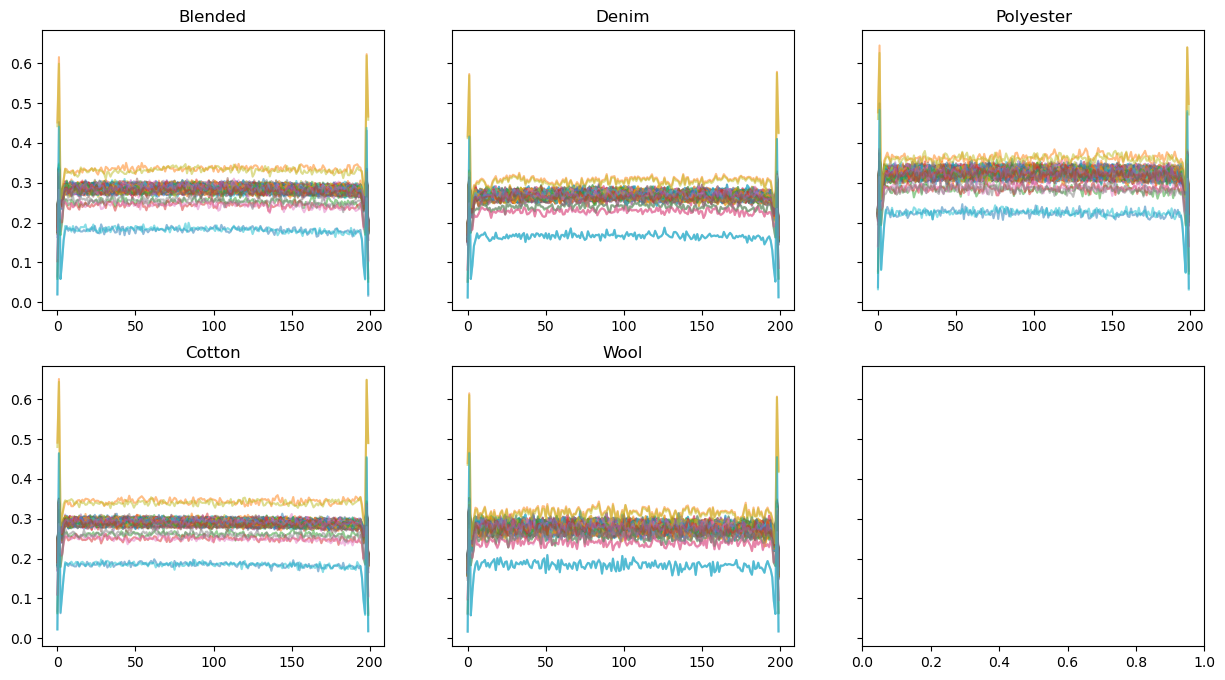

In [49]:
# Visualize average im_threshold for each class
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=True)
axes = axes.flatten()  # Flatten 2D array of axes to 1D

class_names = list(class_averages.keys())

for i, class_name in enumerate(class_names):
    average_threshold = class_averages[class_name]
    ax = axes[i]
    ax.plot(average_threshold, alpha=0.5)
    ax.set_title(class_name)

plt.show()

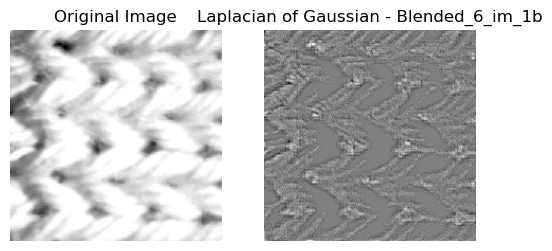

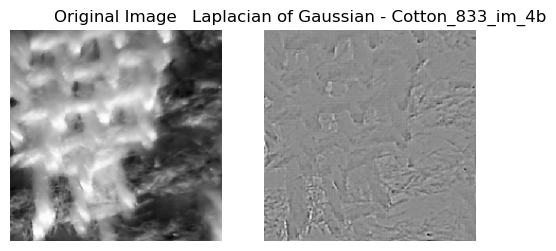

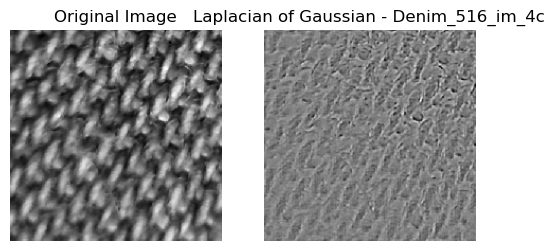

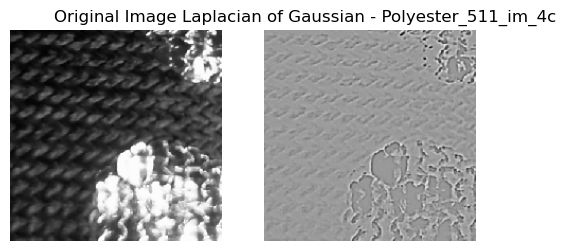

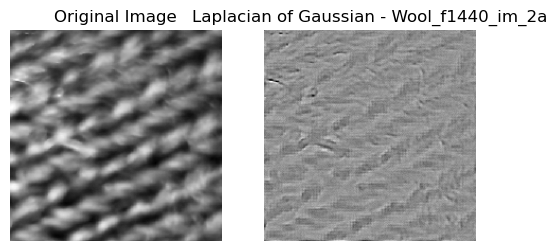

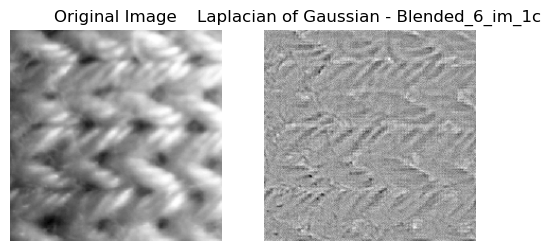

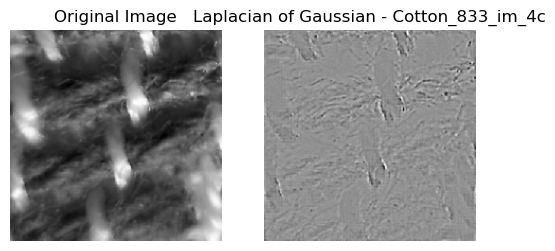

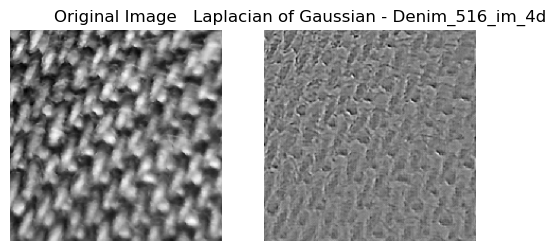

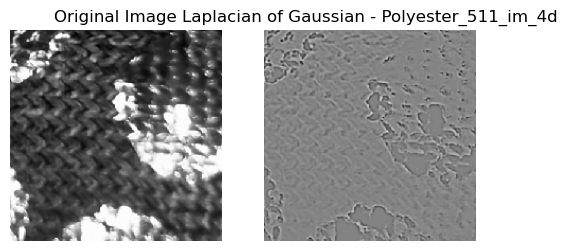

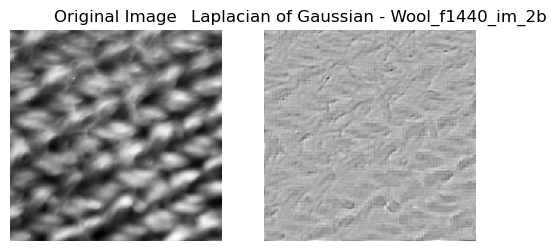

In [18]:
# Laplacian of Gaussian (Erin)
file_list_a = ['Blended_6_im_1b.png','Cotton_833_im_4b.png','Denim_516_im_4c.png','Polyester_511_im_4c.png','Wool_f1440_im_2a.png']
file_list_b = ['Blended_6_im_1c.png','Cotton_833_im_4c.png','Denim_516_im_4d.png','Polyester_511_im_4d.png','Wool_f1440_im_2b.png']

def apply_log(image_path, sample_name, sigma=0.7):
    """
    Apply (LoG) for edge detection.

    Parameters:
    - image_path: Path to the input image.
    - sample_name: Name of sample (w/o png)
    - sigma: Standard deviation of the Gaussian kernel.

    Returns:
    - None: Displays the original and LoG images.
    """
    # read im
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # apply g-blur
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # apply Laplacian filter
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
    
    # viz
    plt.figure(figsize=(6, 3))
    
    # OG
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    # post blur kernel
    plt.subplot(1, 2, 2)
    plt.title(f'Laplacian of Gaussian - {sample_name}')
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')
    
    plt.show()

for i in range(len(file_list_a)):
    # sub-sample from list a
    image_path = os.path.join(train_dir,file_list_a[i])
    image_name = os.path.splitext(file_list_a[i])[0]
    apply_log(image_path, image_name)

for i in range(len(file_list_b)):
    # sub-sample from list b
    image_path = os.path.join(train_dir,file_list_b[i])
    image_name = os.path.splitext(file_list_b[i])[0]
    apply_log(image_path, image_name)

In [ ]:
# Normal 